In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tinytorch import Tensor, nn
from tinytorch.data import MNIST, DataLoader

In [8]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # (1, 28, 28) -conv-> (6, 24, 24) -pool-> (6, 12, 12)
        self.conv1 = nn.Conv2d(1, 6, kernel_size=(5, 5))
        # (6, 12, 12) -> (16, 10, 10) -pool-> (16, 5, 5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=(3, 3))
        
        self.fc1 = nn.Linear(16 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 10)
        
        self.max_pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.relu = nn.ReLU()

    def forward(self, x: Tensor) -> Tensor:
        x = self.conv1(x)
        x = self.max_pool(x)
        conv1_out = self.relu(x)
        
        x = self.conv2(conv1_out)
        x = self.max_pool(x)
        conv2_out = self.relu(x)
        
        x = conv2_out.reshape([x.shape[0], -1])
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return conv1_out, conv2_out, x

In [3]:
print("Loading datasets...")
test_dataset = MNIST(root="./data", train=False, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Loading datasets...


In [9]:
print("Loading model...")
net = SimpleCNN()
net.load('mnist_model.npz')

Loading model...


5


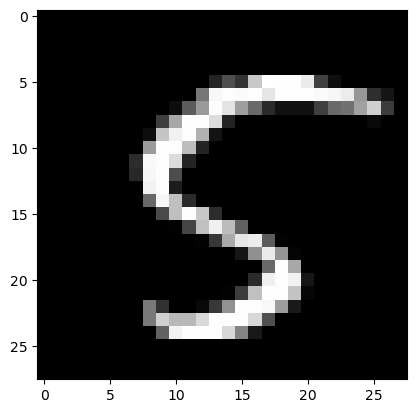

In [44]:
IDX = random.randint(0, len(test_dataset))

image, label = test_dataset[IDX]
print(label)
plt.imshow(image.reshape(28, 28), cmap='gray')

[1]


Text(0.5, 1.0, 'Output')

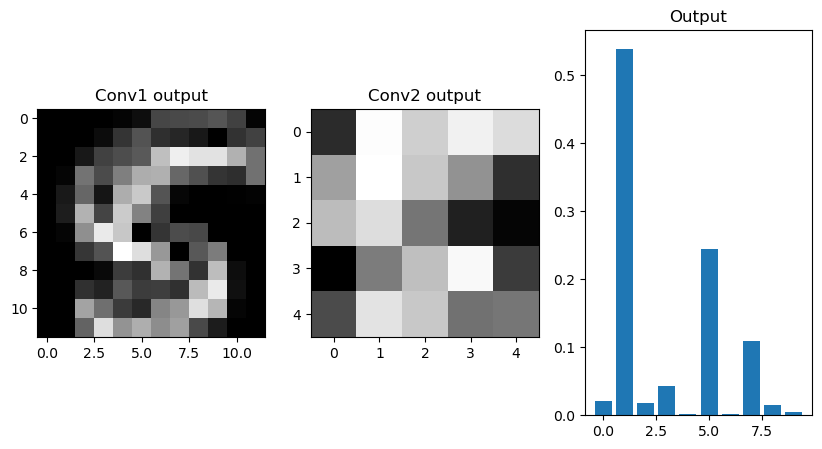

In [45]:
img_tensor = Tensor.from_numpy(image).reshape([1, 1, 28, 28])
# conv1_out: (6, 12, 12), conv2_out: (16, 5, 5), output: (10,)
conv1_out, conv2_out, output = net(img_tensor)

softmax = nn.Softmax()
prob = softmax(output).to_numpy()
print(prob.argmax(axis=1))

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(conv1_out.to_numpy().mean(axis=1).reshape(12, 12), cmap='gray')
plt.title("Conv1 output")
plt.subplot(132)
plt.imshow(conv2_out.to_numpy().mean(axis=1).reshape(5, 5), cmap='gray')
plt.title("Conv2 output")
plt.subplot(133)
plt.bar(range(10), prob.reshape(10))
plt.title("Output")